In [39]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% end of housekeeping

# conditional formation constants

Since the fraction of deprotonate ligand is constant at constant pH it is possible to express thermodynamic formation constants (independent of pH) as conditional formation constants (dependent on pH).

$$K_f^\prime = K_f \times \alpha$$

We derived in class how free metal could be calculated as a function of the conditional formation constant, total metal and total ligand.  As we often find in this course it is a quadratic equation

$a=K_f^\prime$

$b=K_f^\prime L_T - K_f^\prime M_T + 1$

$c= -M_T$

In the code below you can see the plot of the "binding isotherm" for metal to ligand. If you change the pH you will see how the binding changes.  I just picked a monoprotic acid with Ka value of 5 and a metal with a binding constant of logKf of 10 with that same acid.


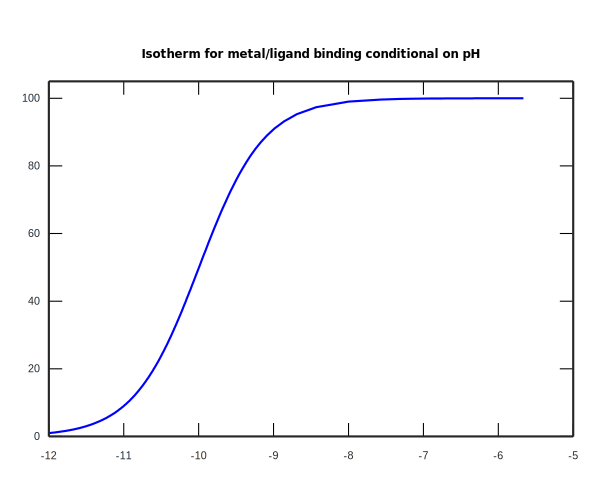

In [40]:
%plot -s 600,500 -f 'svg'

pH =7; % this is what you would change to see the changes

% now the other constants

LT=1e-6; Kf=10^10; Ka=10^-5; logMT=-10:0.01:-5.5; MT=10.^logMT; H=10^-pH;

% now the calculations

alpha=Ka/(H+Ka);
Kfprime = Kf*alpha;

for i=1:length(MT)
    a=Kfprime; b=Kfprime*LT-Kfprime*MT(i)+1;
    c=-MT(i);
    t=roots([a b c]); %finds the roots
    t=t(imag(t)==0); %sets any imaginary roots to zero
    % display the positive real root
    t=t(t>0);
    logM(i)=log10(t);
    bound(i)=100*((MT(i)-t)/LT);
end

plot(logM,bound,'b','linewidth',2)
set(gca,'linewidth',2)
title('Isotherm for metal/ligand binding conditional on pH')

axis([-12 -5 0 105])

